In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

print("✅ Drive mounted successfully.")

Mounted at /content/drive
✅ Drive mounted successfully.


In [2]:
!cp -r /content/drive/MyDrive/BAE--Bringing-Aesthetics-to-Emotions/data/mood_data /content/mood_data

In [3]:
# preprocess_mood_data.py
import pandas as pd
import os

IMG_BASE_DIR = "/content/mood_data"
OUTPUT_PATH = "/content/mood_data/filtered_labels_auto.csv"
TARGET_CLASSES = ['happy', 'neutral', 'sad']
SUBSETS = ['Train', 'Test']

data = []

for subset in SUBSETS:
    for mood in TARGET_CLASSES:
        img_folder = os.path.join(IMG_BASE_DIR, subset, mood)
        if not os.path.exists(img_folder):
            continue
        for img_file in os.listdir(img_folder):
            if img_file.endswith(".png") or img_file.endswith(".jpg"):
                data.append({
                    "subset": subset,
                    "label": mood,
                    "filename": img_file,
                    "full_path": os.path.join(img_folder, img_file)
                })

df = pd.DataFrame(data)
print(f"Total images found: {len(df)}")
df.to_csv(OUTPUT_PATH, index=False)
print(f"Saved filtered CSV to {OUTPUT_PATH}")


Total images found: 14846
Saved filtered CSV to /content/mood_data/filtered_labels_auto.csv


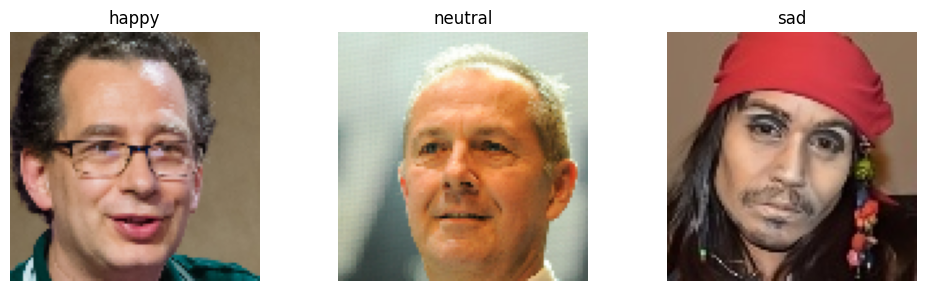

In [4]:
# visualize_mood_data.py
import pandas as pd
import matplotlib.pyplot as plt
import cv2, os, random

LABEL_PATH = "/content/mood_data/filtered_labels_auto.csv"
IMG_DIR = "/content/mood_data"

df = pd.read_csv(LABEL_PATH)
classes = df['label'].unique()

plt.figure(figsize=(10,3))
for i, cls in enumerate(classes):
    sample = df[df['label']==cls].sample(1).iloc[0]
    img_path = os.path.join(IMG_DIR, sample['full_path'])
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.tight_layout()
plt.show()

Found 11877 validated image filenames belonging to 3 classes.
Found 2969 validated image filenames belonging to 3 classes.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,340,163 (8.93 MB)

 Trainable params: 1,608,579 (6.14 MB)

 Non-trainable params: 731,584 (2.79 MB)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


371/372 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8339 - loss: 0.4157

372/372 ━━━━━━━━━━━━━━━━━━━━ 59s 109ms/step - accuracy: 0.8342 - loss: 0.4150 - val_accuracy: 0.8855 - val_loss: 0.4944
Epoch 2/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9408 - loss: 0.1642 - val_accuracy: 0.7023 - val_loss: 1.2822
Epoch 3/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9558 - loss: 0.1259 - val_accuracy: 0.7157 - val_loss: 1.7072
Epoch 4/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9607 - loss: 0.1095 - val_accuracy: 0.8599 - val_loss: 0.6001
Epoch 5/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9663 - loss: 0.0905 - val_accuracy: 0.8855 - val_loss: 0.6441
Epoch 6/20
372/372 ━━━━━━━━━━━━━━━━━━━━ 24s 64ms/step - accuracy: 0.9709 - loss: 0.0844 - val_accuracy: 0.8757 - val_loss: 0.5049
[INFO] Model saved automatically to /content/mobilenetv2_mood_3class.h5


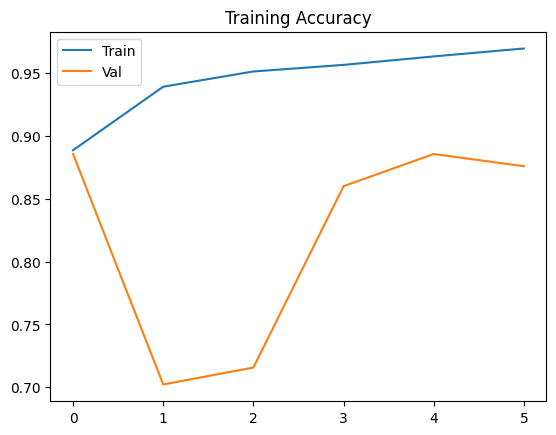

In [6]:
# train_mobilenetv2_model.py
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

BASE_DIR = "/content/mood_data"
IMG_DIR = "/content/mood_data"
CSV_PATH = "/content/mood_data/filtered_labels_auto.csv"
SAVE_PATH = "/content/mobilenetv2_mood_3class.h5"  # <-- Save to a safe, guaranteed writeable location

os.makedirs(os.path.dirname(SAVE_PATH), exist_ok=True)

# ==== Load metadata ====
df = pd.read_csv(CSV_PATH)

# ==== Data generators ====
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

train_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory=IMG_DIR,
    x_col="full_path",
    y_col="label",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)
val_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory=IMG_DIR,
    x_col="full_path",
    y_col="label",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# ==== Build model ====
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
output = Dense(3, activation='softmax')(x)
mood_model = Model(inputs=base_model.input, outputs=output)

mood_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mood_model.summary()

# ==== Callbacks ====
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(SAVE_PATH, save_best_only=True, monitor='val_accuracy', mode='max')
]

# ==== Train ====
history = mood_model.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=callbacks)

# ==== Ensure model is saved ====
# Manual save in case ModelCheckpoint did not trigger
if not os.path.exists(SAVE_PATH):
    print("[WARN] ModelCheckpoint did not save the model, saving manually...")
    mood_model.save(SAVE_PATH)
    print(f"[INFO] Model manually saved to {SAVE_PATH}")
else:
    print(f"[INFO] Model saved automatically to {SAVE_PATH}")

# ==== Plot ====
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend(); plt.title("Training Accuracy"); plt.show()


In [6]:
# predict_mood.py
import os, numpy as np, tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

MODEL_PATH = "/content/mobilenetv2_mood_3class.h5"
MOOD_LABELS = ['happy', 'neutral', 'sad']

model = tf.keras.models.load_model(MODEL_PATH)

def predict_mood(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    idx = np.argmax(preds)
    return MOOD_LABELS[idx], float(np.max(preds))

if __name__ == "__main__":
    test_img = "/content/mood_data/Test/neutral/ffhq_1000.png"
    mood, conf = predict_mood(test_img)
    print(f"Predicted mood: {mood} ({conf*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
Predicted mood: neutral (66.44%)


In [10]:
if __name__ == "__main__":
    test_img = "/content/Roopak Passport size photo.jpg"
    mood, conf = predict_mood(test_img)
    print(f"Predicted mood: {mood} ({conf*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted mood: happy (99.98%)


In [8]:
if __name__ == "__main__":
    test_img = "/content/IMG-20240701-WA0022.jpg"
    mood, conf = predict_mood(test_img)
    print(f"Predicted mood: {mood} ({conf*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted mood: neutral (97.67%)
